In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/RossB327/DH2002/refs/heads/main/DH2002_CleanedData.csv")

df.dtypes

,0
Day,int64
Month,int64
Day Name,object
Water Drank (ml),int64
Sleep Gotten (hrs),float64
Caffeine Drank (mg),int64
Steps Taken,int64
Time on Social Media (min),int64
Energy Rating,int64


<Axes: title={'center': 'Average Amount of Water Drank per Day'}, xlabel='Day Name', ylabel='Water (ml)'>

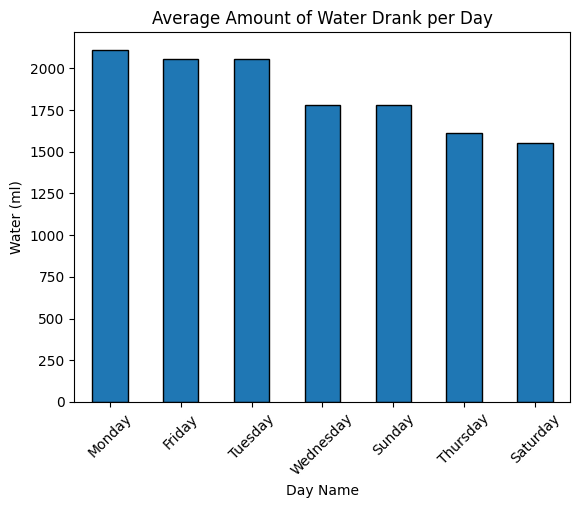

In [71]:
# Group my data by day and find the average water drank
df_water = df.groupby("Day Name")["Water Drank (ml)"].mean()

# Sort the data by biggest to smallest and plot a bar chart
df_water.sort_values(ascending = False).plot.bar(
            x = "Day Name",
            y = "Water Drank (ml)",
            title="Average Amount of Water Drank per Day",
            ylabel="Water (ml)",
            edgecolor = "Black", # Give the bars an outline
            rot = 45) # Rotation of bar labels

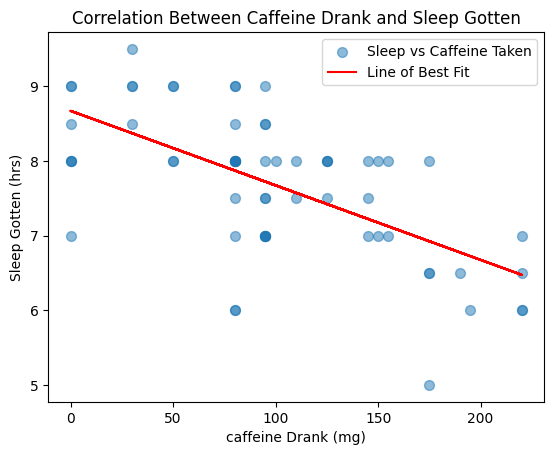

In [78]:
# Create scatter plot
plt.scatter(df["Caffeine Drank (mg)"],
            df["Sleep Gotten (hrs)"],
            label = "Sleep vs Caffeine Taken",
            alpha=0.5, # Increase opacity to show overlap
            s=50) # Size of points

# Calculate line of best fit
slope, intercept = np.polyfit(df["Caffeine Drank (mg)"],
                              df["Sleep Gotten (hrs)"],
                              1)
# Plot the line of best fit
plt.plot(df["Caffeine Drank (mg)"],
         slope*df["Caffeine Drank (mg)"]
         + intercept,
         color='red',
         label='Line of Best Fit')

# Label graph and show it (+ legend)
plt.xlabel("caffeine Drank (mg)")
plt.ylabel("Sleep Gotten (hrs)")
plt.title("Correlation Between Caffeine Drank and Sleep Gotten")
plt.legend()
plt.show()

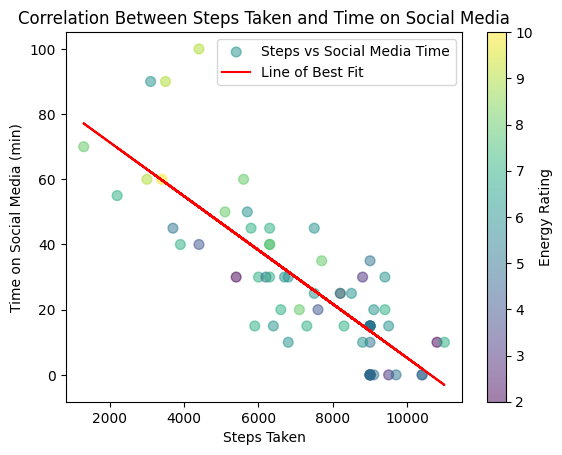

In [85]:
# Create scatter plot with colormap
scatter = plt.scatter(df["Steps Taken"],
                      df["Time on Social Media (min)"],
                      c=df["Energy Rating"], # Adding a third variable (energy)
                      cmap='viridis',  # Choosing a color map
                      alpha=0.5, # ALpha to show overlap
                      s=50,
                      label='Steps vs Social Media Time')

# Line of best fit
slope, intercept = np.polyfit(df["Steps Taken"],
                              df["Time on Social Media (min)"],
                              1)
plt.plot(df["Steps Taken"],
         slope * df["Steps Taken"] + intercept,
         color='red',
         label='Line of Best Fit')

# Add labels and legend
plt.xlabel("Steps Taken")
plt.ylabel("Time on Social Media (min)")
plt.title("Correlation Between Steps Taken and Time on Social Media")
plt.legend()

# Add colorbar for Energy Rating
cbar = plt.colorbar(scatter)
cbar.set_label("Energy Rating")

# Show plot
plt.show()


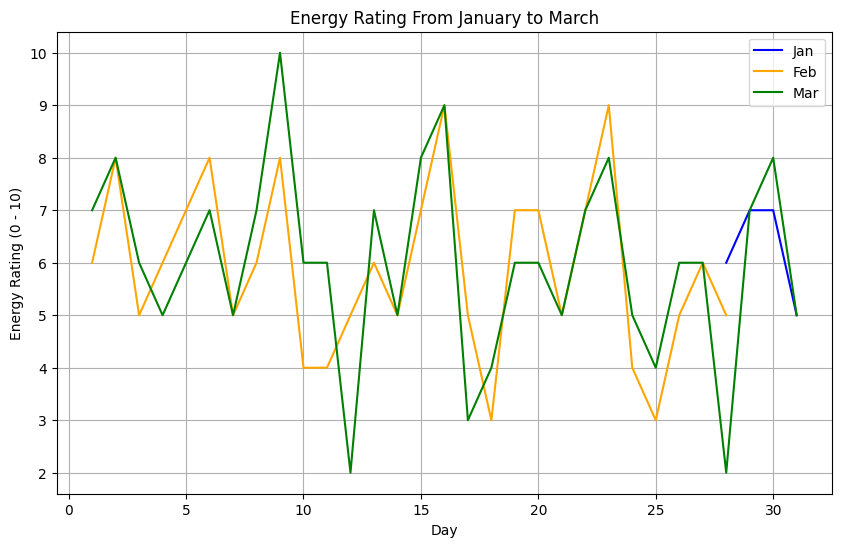

In [74]:
# Filter the data (Months are stored as integers)
df_jan = df[df["Month"] == 1]
df_feb = df[df["Month"] == 2]
df_mar = df[df["Month"] == 3]

# Create the figure
plt.figure(figsize=(10, 6))

# Plot each month's data
plt.plot(df_jan["Day"],
         df_jan["Energy Rating"],
         label="Jan",
         color = "blue")

plt.plot(df_feb["Day"],
         df_feb["Energy Rating"],
         label="Feb",
         color = "orange")

plt.plot(df_mar["Day"],
         df_mar["Energy Rating"],
         label="Mar",
         color = "green")

# Labels and legend
plt.xlabel("Day")
plt.ylabel("Energy Rating (0 - 10)")
plt.title("Energy Rating From January to March")

plt.legend()
plt.grid(True)
plt.grid.alpha = 0.5

plt.show()